<a href="https://colab.research.google.com/github/et20024/sp-github/blob/main/Pandas_slike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRIMJER UPOTREBE PANDASA U ANALIZI PODATAKA-GRAFIČKI PRIKAZI**

U nastavku je korišćen fajl i pomoćni kod sa https://realpython.com/pandas-plot-python/
Cilj je da pokažemo koje sve mogućnosti nam nudi Pandas biblioteka, kako samo kroz par linija koda možemo izvršiti manipulacije sa velikim brojem podataka.

In [1]:
import pandas as pd

Fajl sa upotrebljenim podacima : https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv

In [3]:
df = pd.read_csv("recent-grads.csv")

Prikazaćemo prvih pet redova u posmatranoj tabeli, i koje sve to kolone sadrži.

In [4]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


"Median" -srednja zarada radnika sa punim radnim vremenom
"P25th" procenat zarade
"P75th" procenat zarade
"Rank" ostvareni rang prema srednjoj zaradi


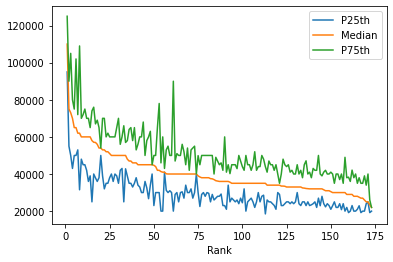

In [5]:
import matplotlib.pyplot as plt
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

Šta zaključujemo sa ovog grafika?
Srednji prihod se smanjuje kako se rang smanjuje. To je očigledno jer je rang određen srednjim prihodom.
Neke specijalnosti imaju praznine između 25% i 75%.Ljudi sa ovim diplomama mogu zarađivati znatno manje ili znatno više od srednjeg prihoda.
Neke druge specijalnosti imaju male praznine između ovih procenata i ljudi sa ovim diplomama zarađuju plate veoma blizu srednjeg prihoda.
Neke specijalnosti imaju širok raspon zarada, a neke uži.

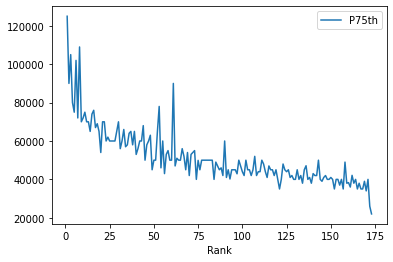

In [6]:
df.plot(x="Rank", y="P75th")

Kada pozovemo .plot() nad serijom

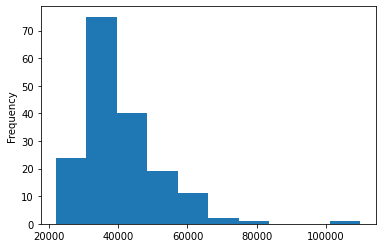

In [8]:
median_column = df["Median"]
median_column.plot(kind="hist")

Kada uvidimo da se neki podatak drastično odvaja od ostalih .
Zelimo da uporedimo više tačaka kako bismo uvidjeli neke zakonitosti među njima.

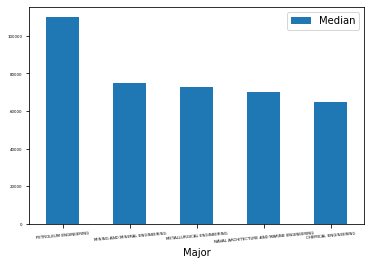

In [10]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

Na posljednjem grafiku vidimo da je zarada naftnih inženjera veća za 20.000 $ od ostalih. Ostale zarade su u realativno jednakom rangu.

Dalje, ako želimo da se bavimo specijalnostima sa zaradom većom od 60.000$ onda to prvo izdvojimo, filtriramo  od ostalih podataka u toj koloni. Zatim pomoću tri stupca na istom grafiku prikažemo zarade P25th,P75th i ovu "Median" srednju zaradu.

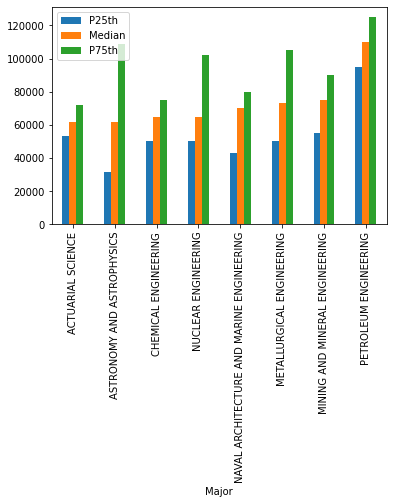

In [11]:
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

Pitamo se zašto su nam ove ekstremne vrijednosti toliko važne? Zato što nekada one mogu ukazati i na pogrešne ili nevažeće podatke. Istraživanje odstupanja je veoma važan korak u čišćenju podataka. Uglavnom dalja analiza daje pouzdanije rezultate bez posmatranja ovih ekstremnih vrijednosti.

U slučaju kada želimo da provjerimo da li su dvije kolone povezane i to radimo pomoću dijagrama rasipanja.

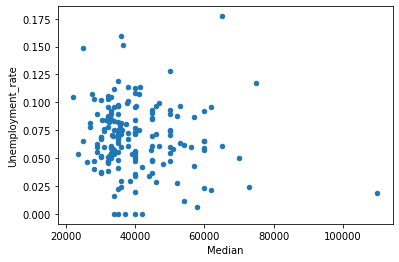

In [12]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

Posmatrajući grafik uočava se da ne postoji velika korelacija između nezaposlenosti i zarade. Ovaj dijagram rasipanja je dobar  da vidimo da li postoji mogućnost korelacije, ali nije potpuno pouzdan alat koji će dati definitivne zaključke. U tom slučaju možemo koristiti druge alate za računanje korelacije.

U nastavku dat je jedan primjer grupisanja podataka, kada nam nekada nisu od koristi prethodni grafici sa stupcima, onda koristimo "pie" gdje će nam se prikazati mali isječci sa onim vrijednostima koje se poklapaju.

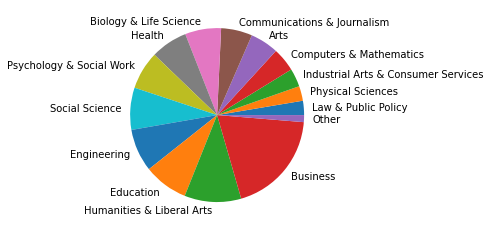

In [14]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

Dok je "parče" *Ostalo* malo, to je dobar znak da je spajanje manjih kategorija bio dobar izbor.